# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Online Retail.xlsx", engine="openpyxl")
print(df.isnull().sum())
df = df.dropna()
print(df.describe(include='all'))
print("Duplicate Rows", df.duplicated().sum())
df = df.drop_duplicates()
print(df.dtypes)
print(df.info())
print("shape", df.shape)
print(df.head())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
        InvoiceNo StockCode                         Description  \
count    406829.0    406829                              406829   
unique    22190.0      3684                                3896   
top      576339.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        542.0      2077                                2070   
mean          NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   

      

In [3]:
df_mean = df.mean(numeric_only=True)
print("Mean")
print(df_mean)
df_median = df.median(numeric_only=True)
print("Median")
print(df_median)
df_mode = df.mode()
print("Mode")
print(df_mode)

print("Standard Deviation")
print(df.std(numeric_only=True))

print("Range")
print(df.max(numeric_only=True) - df.min(numeric_only=True))
      


Mean
Quantity         12.183273
UnitPrice         3.474064
CustomerID    15281.160818
dtype: float64
Median
Quantity          5.00
UnitPrice         1.95
CustomerID    15145.00
dtype: float64
Mode
  InvoiceNo StockCode                         Description  Quantity  \
0    576339    85123A  WHITE HANGING HEART T-LIGHT HOLDER         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2011-11-14 15:27:00       1.25     17841.0  United Kingdom  
Standard Deviation
Quantity       250.283037
UnitPrice       69.764035
CustomerID    1714.006089
dtype: float64
Range
Quantity      161990.0
UnitPrice      38970.0
CustomerID      5941.0
dtype: float64


InvoiceDate
2010-12-01    45867.26
2010-12-02    45656.47
2010-12-03    22553.38
2010-12-05    30970.28
2010-12-06    30258.77
                ...   
2011-12-05    56513.41
2011-12-06    43540.22
2011-12-07    68867.66
2011-12-08    49318.74
2011-12-09    15540.59
Name: TotalSales, Length: 305, dtype: float64
Sales Analysis


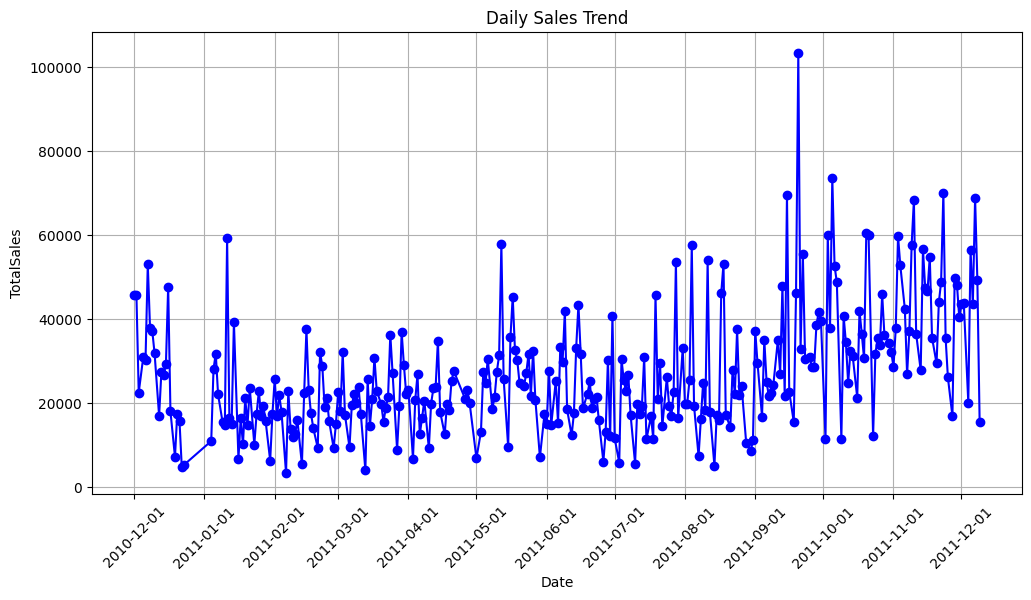

In [4]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
daily_sales = df.groupby(df["InvoiceDate"].dt.date)["TotalSales"].sum()
print(daily_sales)
#Plot
print("Sales Analysis")
plt.figure(figsize=(12,6))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle="-", color="blue")
plt.xticks(pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq="MS"), rotation=45)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("TotalSales")
plt.grid()
plt.show()



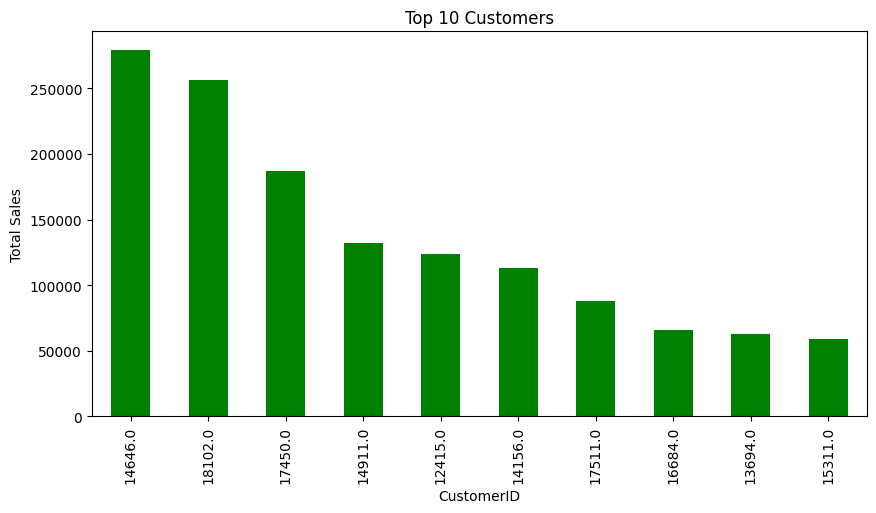

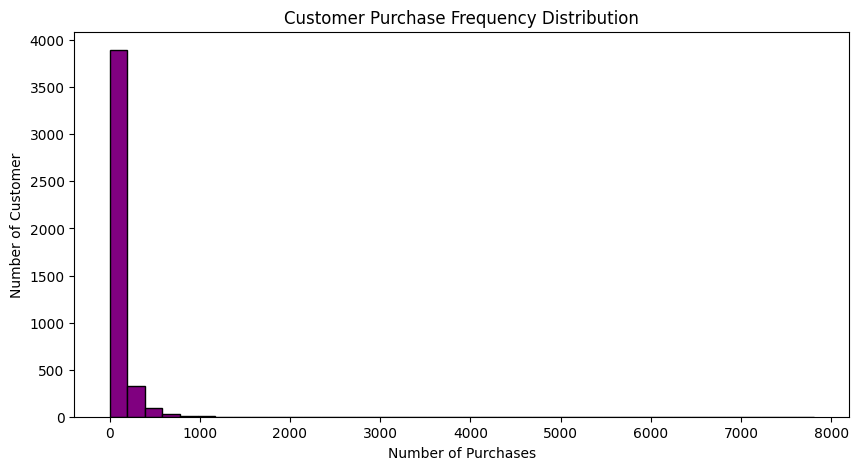

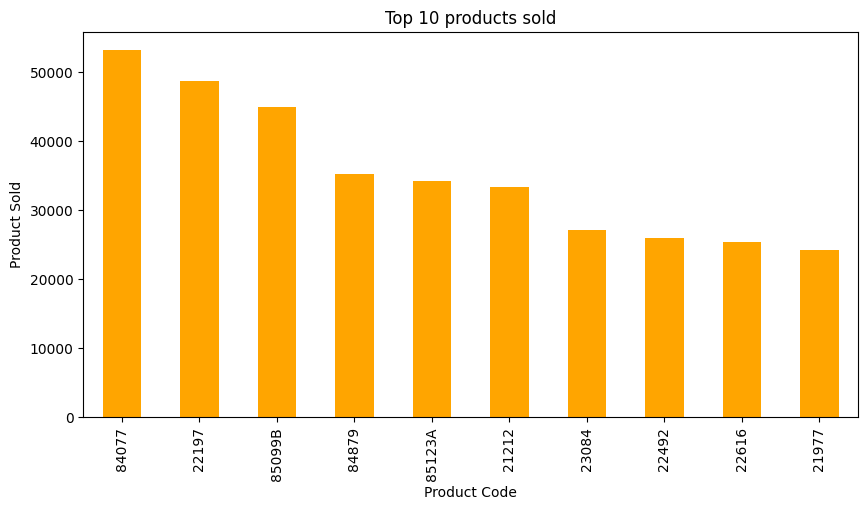

In [17]:
top_customer = df.groupby('CustomerID')['TotalSales'].sum().nlargest(10)
plt.figure(figsize=(10,5))
top_customer.plot(kind="bar", color="green")
plt.title("Top 10 Customers")
plt.xlabel("CustomerID")
plt.ylabel("Total Sales")
plt.show()

#Customer Purchase Histogram
customer_frequency=df['CustomerID'].value_counts()
plt.figure(figsize=(10,5))
plt.hist(customer_frequency, bins=40, color="purple",edgecolor="black")
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customer")
plt.show()

#Best Selling products
top_products = df.groupby('StockCode')["Quantity"].sum().nlargest(10)
plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="orange")
plt.title("Top 10 products sold")
plt.xlabel("Product Code")
plt.ylabel("Product Sold")
plt.show()

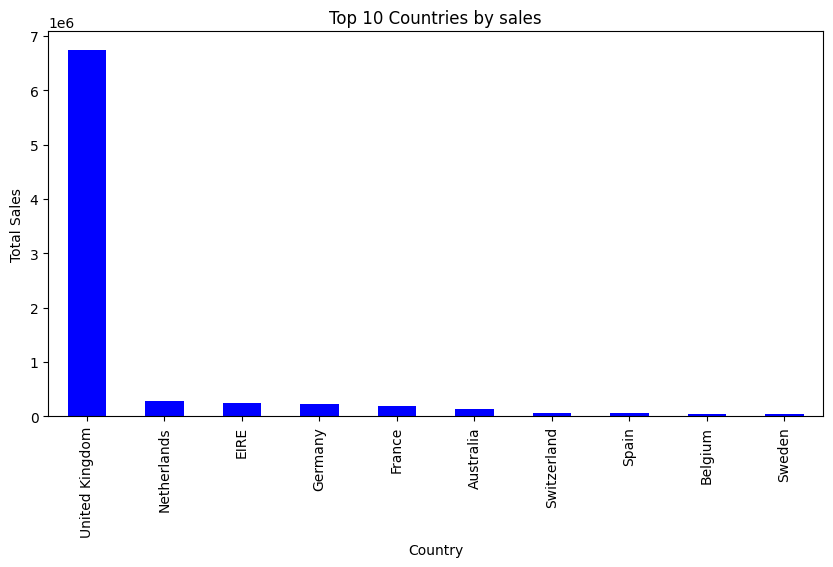

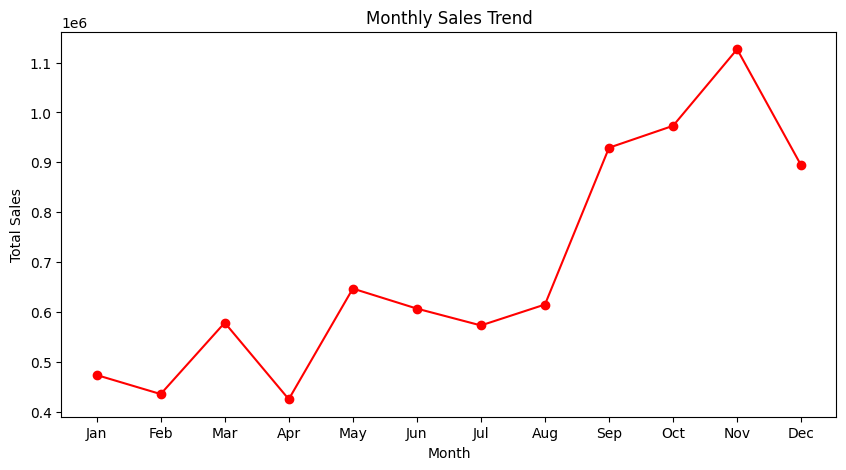

In [5]:
country_sales = df.groupby('Country')['TotalSales'].sum().nlargest(10)
plt.figure(figsize=(10,5))
country_sales.plot(kind='bar', color='blue')
plt.title("Top 10 Countries by sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()

#Seasonal Sales Trend
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['TotalSales'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, marker="o", linestyle="-", color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13),labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()